In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Config Comparison

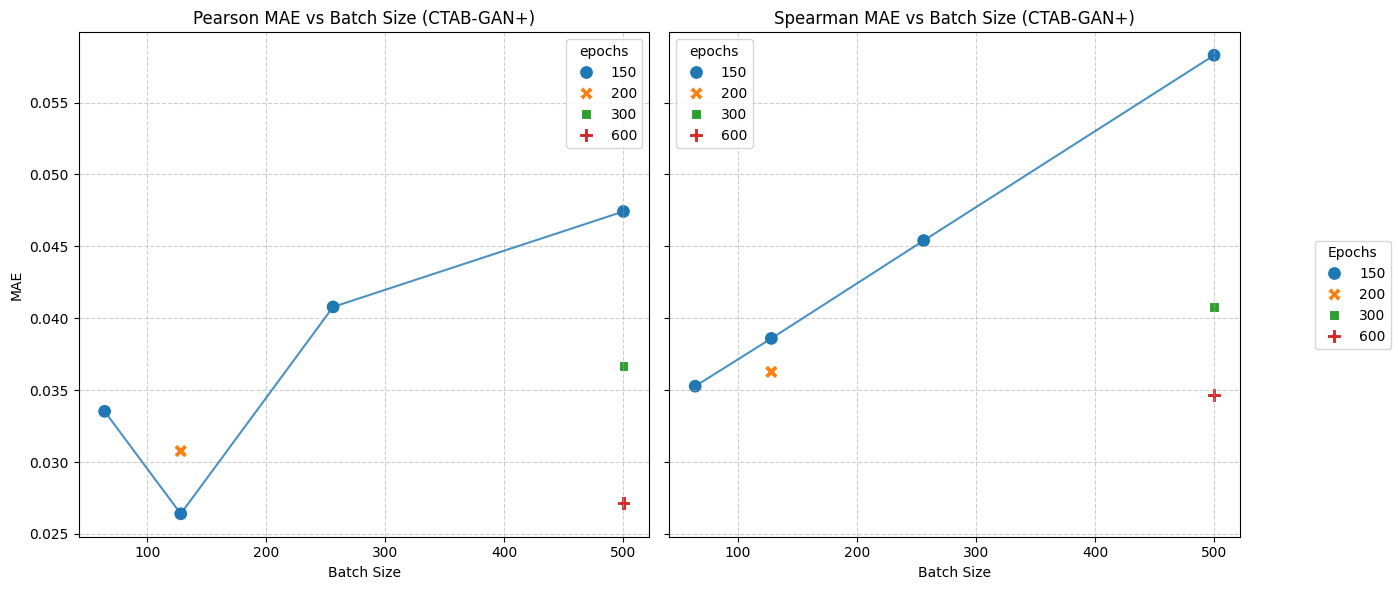

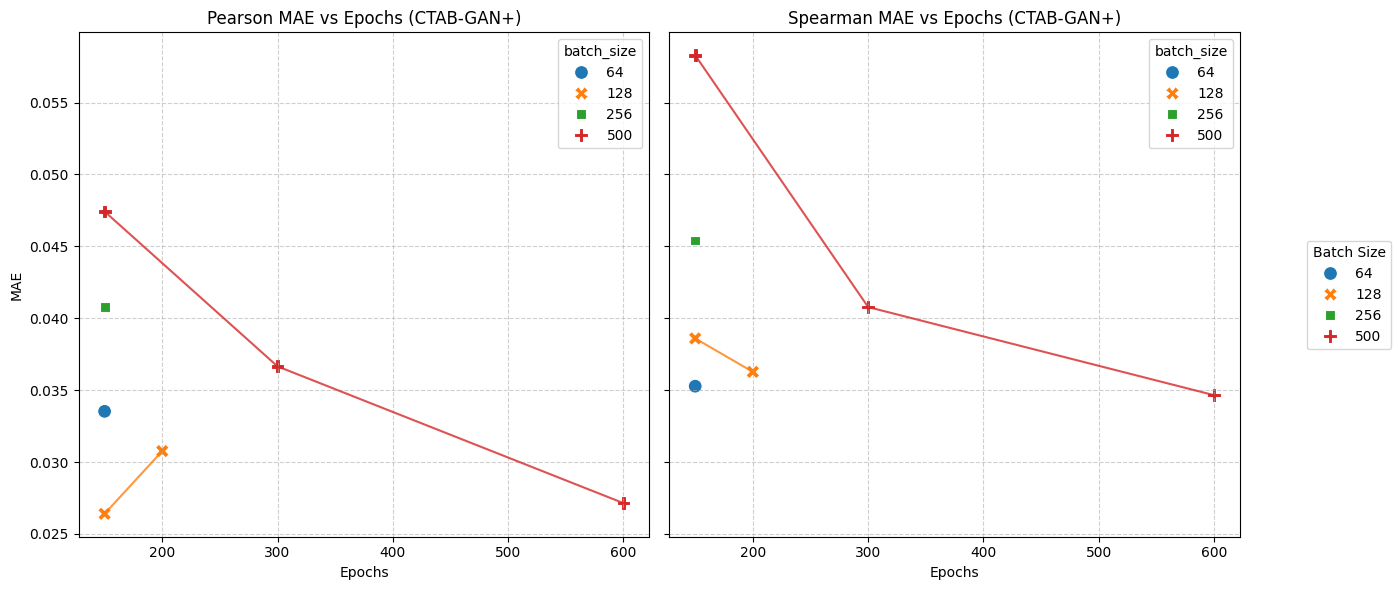

In [2]:
ctabgan_df = pd.read_csv("Experiment_logs/experiment_log_ctabgan.csv")

# Filtering default learning rate and drop last 2 rows (repeated configs)
ctabgan_df = ctabgan_df[ctabgan_df["learning_rate"] == 0.0002].iloc[:-2, :]

# Keeping first run per (epochs, batch_size)
ctabgan_best = ctabgan_df.groupby(["epochs", "batch_size"], as_index=False).first()

# Chart 1: Batch size on x-axis, grouped by epochs
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=ctabgan_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=ctabgan_best,
    x="batch_size",
    y="pearson_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Batch Size (CTAB-GAN+)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=ctabgan_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    style="epochs",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=ctabgan_best,
    x="batch_size",
    y="spearman_mae",
    hue="epochs",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Batch Size (CTAB-GAN+)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Epochs", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

# Chart 2: Epochs on x-axis, grouped by batch size 
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.scatterplot(
    data=ctabgan_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[0]
)
sns.lineplot(
    data=ctabgan_best,
    x="epochs",
    y="pearson_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Pearson MAE vs Epochs (CTAB-GAN+)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("MAE")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.scatterplot(
    data=ctabgan_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    style="batch_size",
    s=100,
    palette="tab10",
    ax=axes[1]
)
sns.lineplot(
    data=ctabgan_best,
    x="epochs",
    y="spearman_mae",
    hue="batch_size",
    legend=False,
    alpha=0.8,
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Spearman MAE vs Epochs (CTAB-GAN+)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle="--", alpha=0.6)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Batch Size", loc="center right")

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [3]:
import pandas as pd

ctabgan_log = pd.read_csv("Experiment_logs/experiment_log_ctabgan.csv")
ctabgan_df = ctabgan_df[ctabgan_df["learning_rate"] == 0.0002]

# Selecting the last 3 rows (best configs)
best_configs = ctabgan_df.tail(3)

# Compute median Pearson & Spearman MAE
median_mae = best_configs[["pearson_mae", "spearman_mae"]].median()

print("Median MAE of best configs:")
print(median_mae)


Median MAE of best configs:
pearson_mae     0.033526
spearman_mae    0.036271
dtype: float64


In [4]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed_dedu.csv")
CTABGANPlus_df = pd.read_csv('Data/Synthetic_Datasets/CTABGANPlus/run_9.csv')

In [5]:
print('CTABGANPlus Dataset')
display(CTABGANPlus_df.head())

CTABGANPlus Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,1.993016,-0.488549,0.192846,-0.480744,0.047200,-0.066784,-0.707363,1.413708,0.219794,1.029692,0.010597,1,red
1,-0.436446,-1.189076,0.948209,1.029134,-0.471326,0.879618,0.779739,0.315379,1.140096,-0.547986,-0.800738,1,white
2,2.293695,-0.577266,1.599477,-0.430785,0.561313,-1.621366,-2.160538,1.112441,0.655864,1.138405,1.743148,1,red
3,-0.263646,-0.164644,0.437775,1.396788,0.412440,0.580622,0.296786,0.366992,-0.839618,0.034122,-0.664654,0,white
4,-0.480746,-0.765851,-0.082481,0.106049,-0.631584,0.876685,0.433291,-0.861113,-1.055930,-0.670916,0.797122,1,white


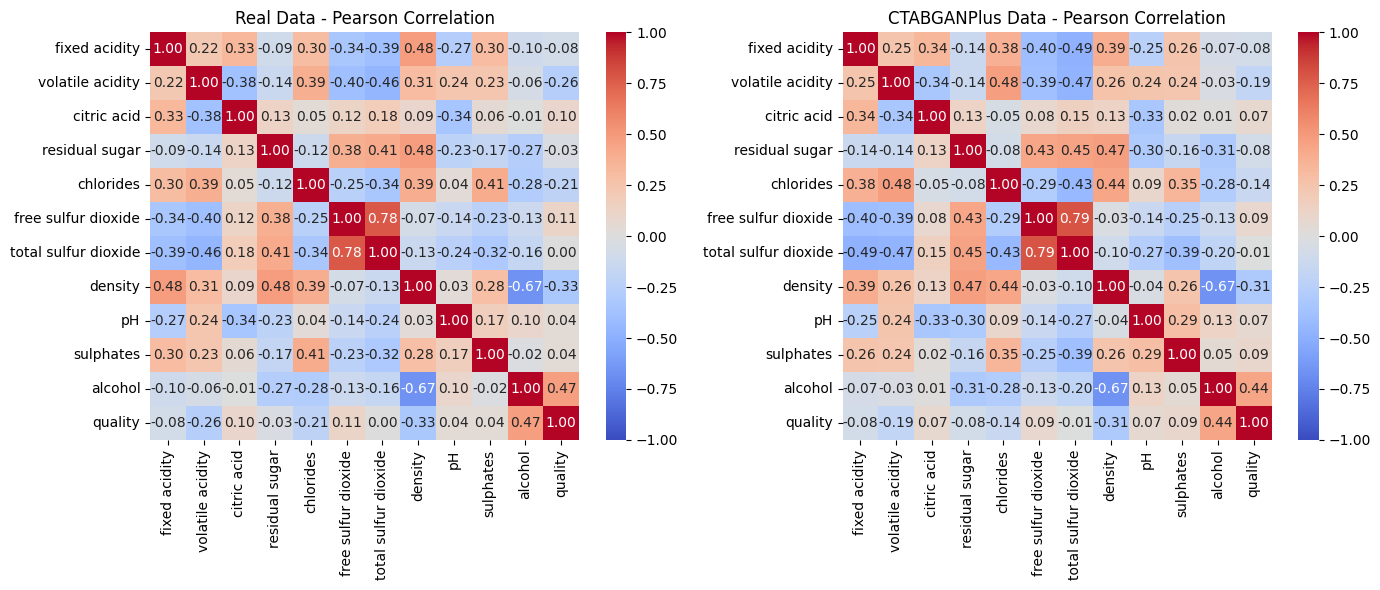

In [6]:
real_num = real_df.select_dtypes(include='number')
CTABGANPlus_num = CTABGANPlus_df.select_dtypes(include='number').drop(columns=['type'], errors='ignore')

real_pearson = real_num.corr(method='pearson')
CTABGANPlus_pearson = CTABGANPlus_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(CTABGANPlus_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('CTABGANPlus Data - Pearson Correlation')

plt.tight_layout()
plt.show()

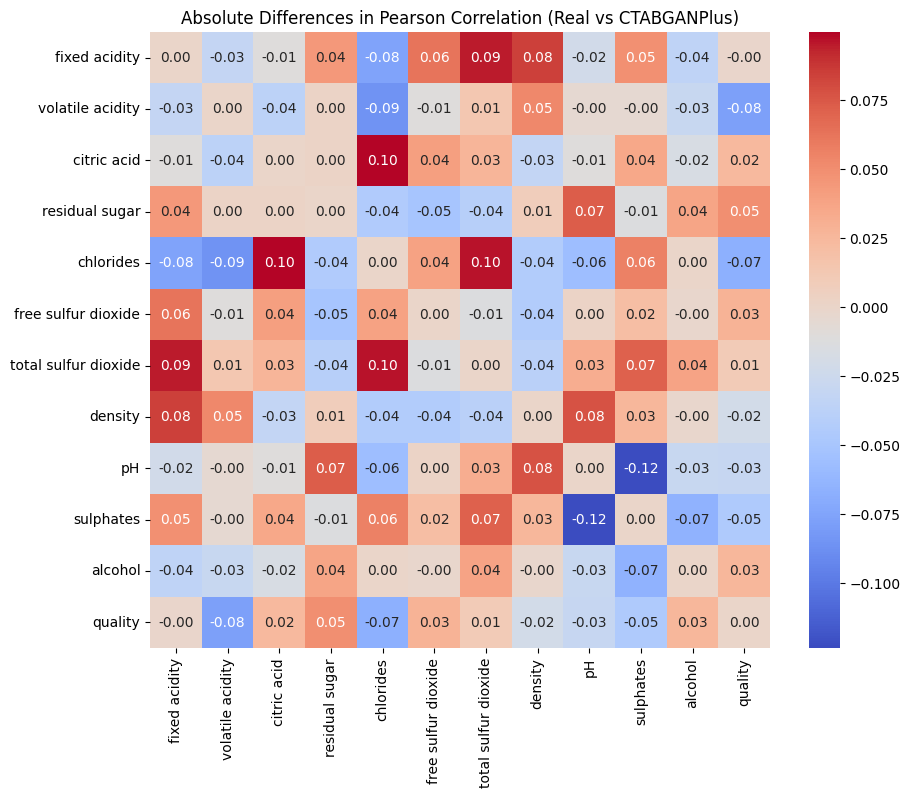

In [7]:

diff_CTABGANPlus = (real_pearson - CTABGANPlus_pearson)
plt.figure(figsize=(10, 8))
sns.heatmap(diff_CTABGANPlus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs CTABGANPlus)")
plt.show()

In [8]:
# Compute absolute differences
abs_diff = diff_CTABGANPlus.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Collect correlation differences with actual values
records = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    records.append({
        "Metric": "Pearson",
        "Pair": f"{diff_CTABGANPlus.columns[i]} – {diff_CTABGANPlus.columns[j]}",
        "Real": real_pearson.iloc[i, j],
        "Fake": CTABGANPlus_pearson.iloc[i, j],
        "Abs Δ": abs_diff.iloc[i, j]
    })

# Sort by largest drift
pearson_top3 = sorted(records, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print standalone table
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Pearson shifts:\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in pearson_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))


Mean absolute Pearson diff: 0.038

Top 3 biggest Pearson shifts:

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
pH – sulphates            |    0.17 |    0.29 |   0.12
citric acid – chlorides   |    0.05 |   -0.05 |   0.10
chlorides – total sulfur dioxide |   -0.34 |   -0.43 |   0.10
------------------------------------------------------


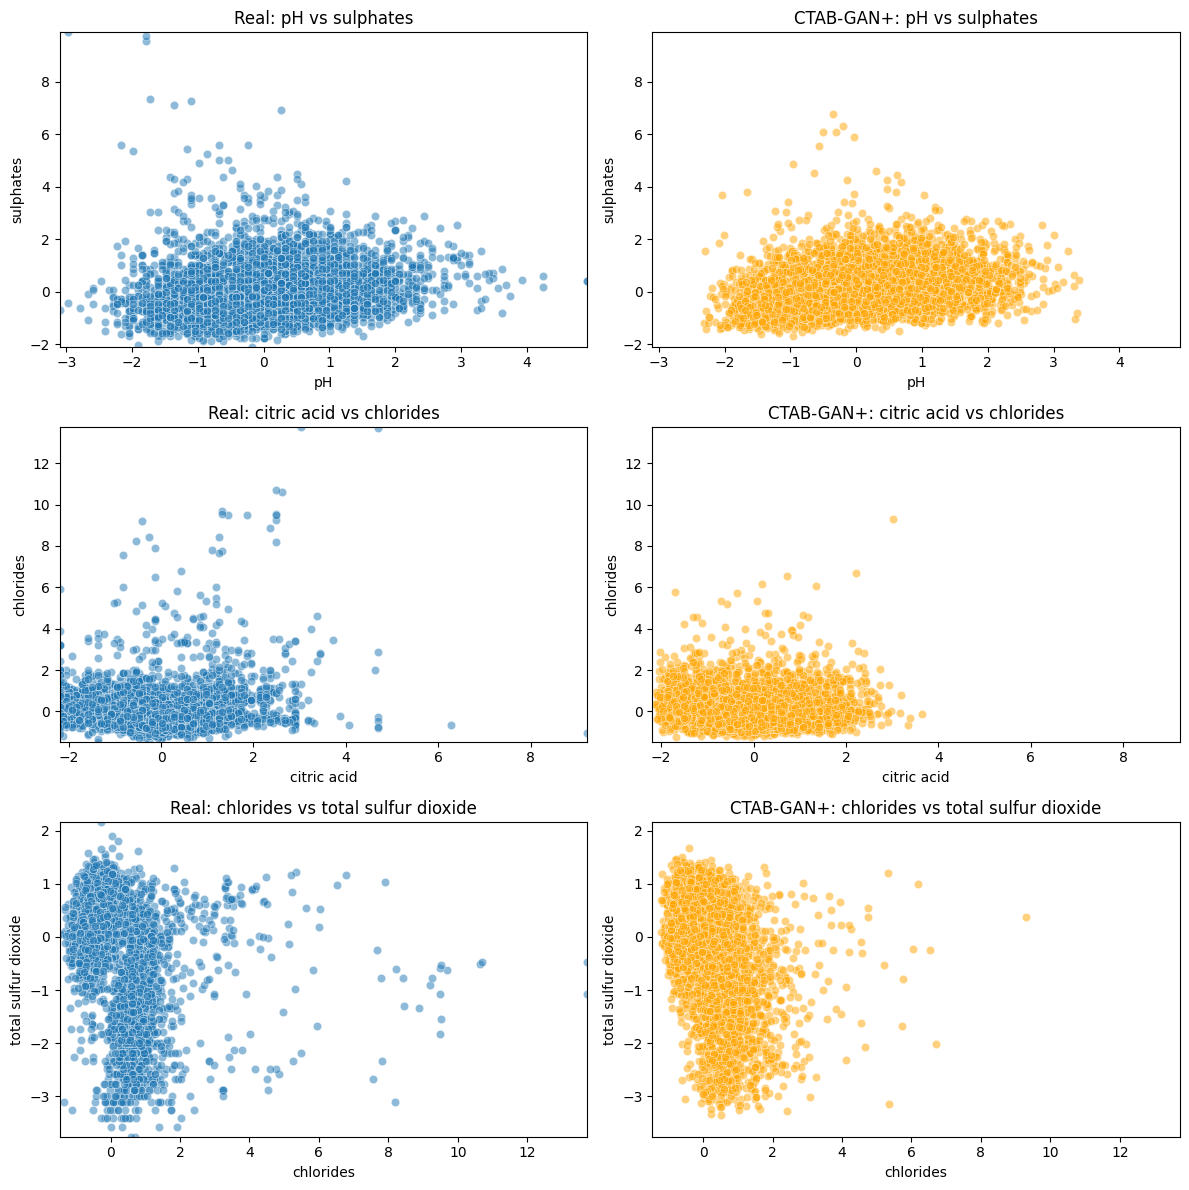

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


pairs = [
    ('pH', 'sulphates'),
    ('citric acid', 'chlorides'),
    ('chlorides', 'total sulfur dioxide')
]

# Plot
plt.figure(figsize=(12, 12))
for i, (x, y) in enumerate(pairs):
    # Get axis limits across real and fake for each pair
    x_min = min(real_df[x].min(), CTABGANPlus_df[x].min())
    x_max = max(real_df[x].max(), CTABGANPlus_df[x].max())
    y_min = min(real_df[y].min(), CTABGANPlus_df[y].min())
    y_max = max(real_df[y].max(), CTABGANPlus_df[y].max())

    # Real data
    plt.subplot(3, 2, 2*i + 1)
    sns.scatterplot(data=real_df, x=x, y=y, alpha=0.5)
    plt.title(f"Real: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Synthetic data
    plt.subplot(3, 2, 2*i + 2)
    sns.scatterplot(data=CTABGANPlus_df, x=x, y=y, alpha=0.5, color='orange')
    plt.title(f"CTAB-GAN+: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


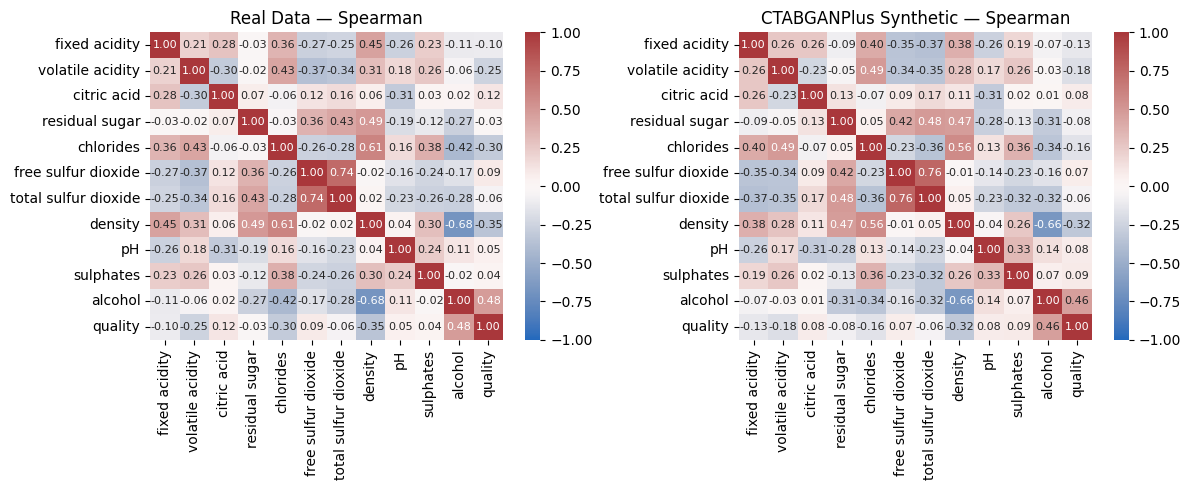

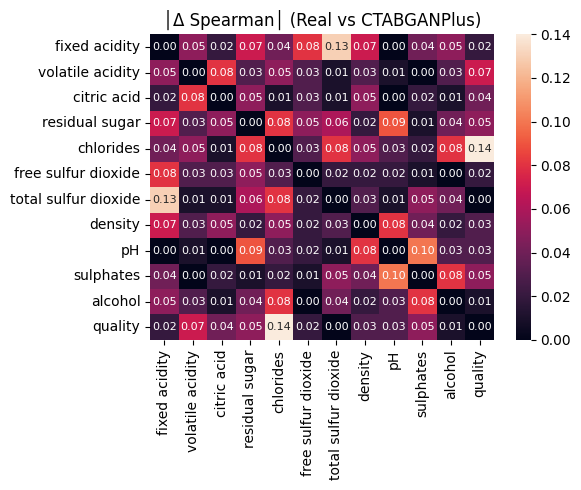

In [10]:
#  Spearman correlation matrices
real_spear = real_num.corr(method="spearman")
CTABGANPlus_spear  = CTABGANPlus_num.corr(method="spearman")

# Plot side by side with numbers (smaller font, 2 decimals)
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Spearman")

sns.heatmap(CTABGANPlus_spear, vmin=-1, vmax=1, center=0, cmap="vlag",
            annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("CTABGANPlus Synthetic — Spearman")

plt.show()

# Compute & plot absolute‐difference
diff_spear = (CTABGANPlus_spear - real_spear).abs().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(diff_spear, vmin=0, vmax=diff_spear.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Spearman│ (Real vs CTABGANPlus)")
plt.tight_layout()
plt.show()


In [11]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff_spear.values[i,j].mean().round(3))

Mean │Δ Spearman│: 0.04


In [12]:
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [(diff_spear.values[i_, j_], diff_spear.columns[i_], diff_spear.columns[j_])
         for i_, j_ in zip(i, j)]

# Sort and take top 5
top3 = sorted(pairs, reverse=True)[:3]

# Print nicely
print("Top 3 biggest Spearman shifts:")
for delta, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {delta:.2f}")


Top 3 biggest Spearman shifts:
  'chlorides' vs 'quality': Δ = 0.14
  'fixed acidity' vs 'total sulfur dioxide': Δ = 0.13
  'pH' vs 'sulphates': Δ = 0.10


In [13]:
# Collect upper-triangle pairs
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [
    {
        "Metric": "Spearman",
        "Pair": f"{diff_spear.columns[i_]} – {diff_spear.columns[j_]}",
        "Real": real_spear.values[i_, j_],
        "Fake": CTABGANPlus_spear.values[i_, j_],
        "Abs Δ": diff_spear.values[i_, j_]
    }
    for i_, j_ in zip(i, j)
]

# Sort and take top 3
spear_top3 = sorted(pairs, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# Pretty print as table
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Spearman shifts:\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for row in spear_top3:
    print(f"{row['Pair']:<{col_width}} | "
          f"{row['Real']:>7.2f} | "
          f"{row['Fake']:>7.2f} | "
          f"{row['Abs Δ']:>6.2f}")
print("-" * len(header))



Top 3 biggest Spearman shifts:

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
chlorides – quality       |   -0.30 |   -0.16 |   0.14
fixed acidity – total sulfur dioxide |   -0.25 |   -0.37 |   0.13
pH – sulphates            |    0.24 |    0.33 |   0.10
------------------------------------------------------


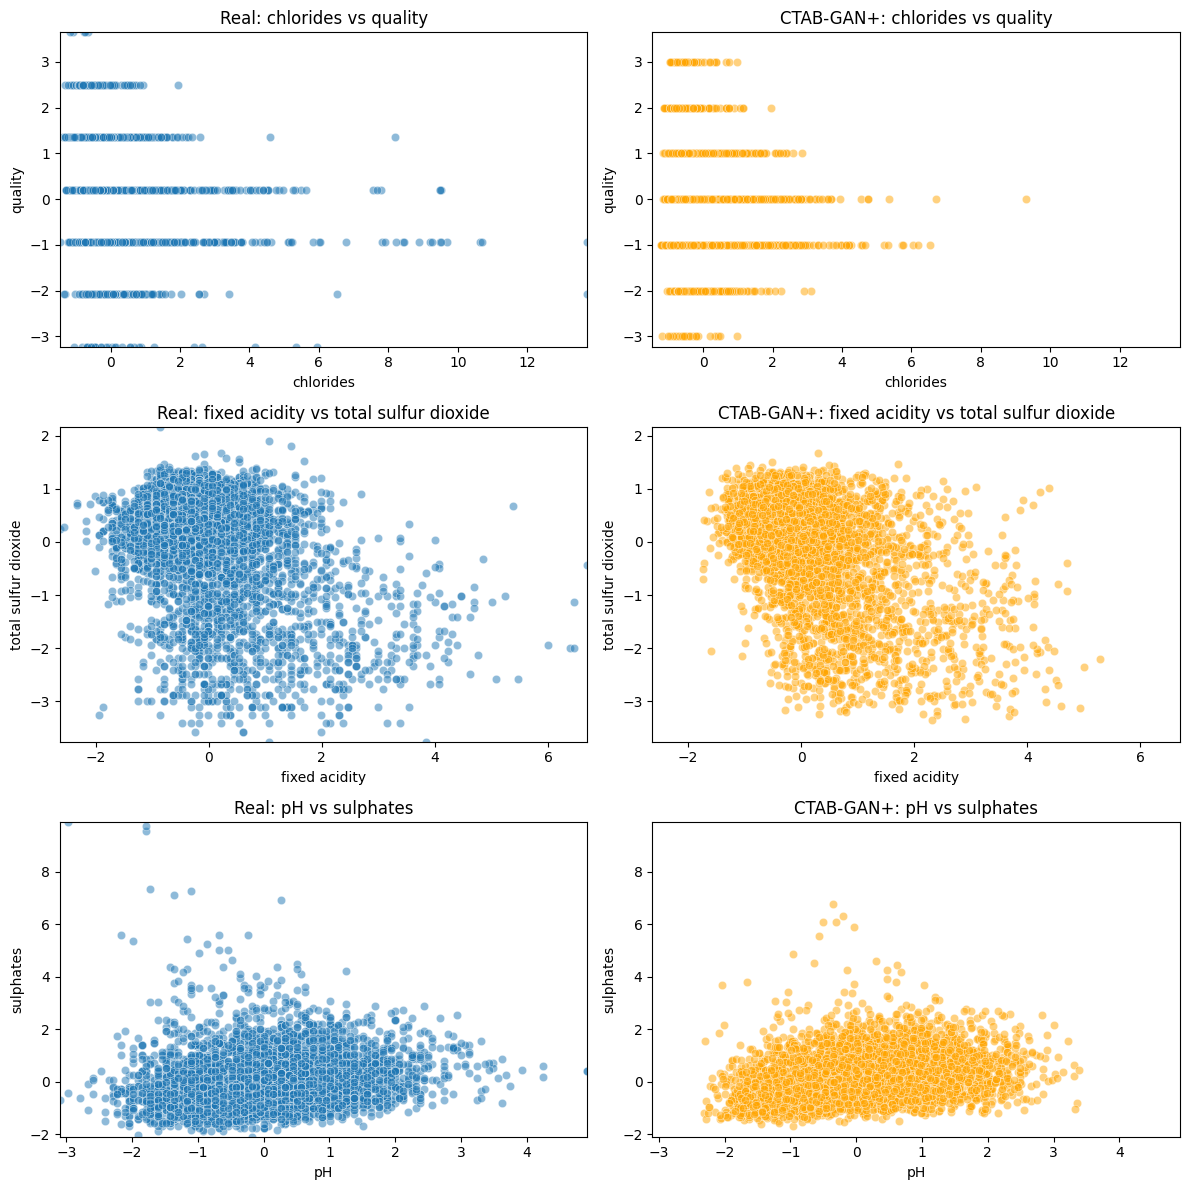

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


pairs = [
    ('chlorides','quality'),
    ('fixed acidity' , 'total sulfur dioxide'),
    ('pH', 'sulphates')
]

# Plot
plt.figure(figsize=(12, 12))
for i, (x, y) in enumerate(pairs):
    # Get axis limits across real and fake for each pair
    x_min = min(real_df[x].min(), CTABGANPlus_df[x].min())
    x_max = max(real_df[x].max(), CTABGANPlus_df[x].max())
    y_min = min(real_df[y].min(), CTABGANPlus_df[y].min())
    y_max = max(real_df[y].max(), CTABGANPlus_df[y].max())

    # Real data
    plt.subplot(3, 2, 2*i + 1)
    sns.scatterplot(data=real_df, x=x, y=y, alpha=0.5)
    plt.title(f"Real: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Synthetic data
    plt.subplot(3, 2, 2*i + 2)
    sns.scatterplot(data=CTABGANPlus_df, x=x, y=y, alpha=0.5, color='orange')
    plt.title(f"CTAB-GAN+: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

Distance correlation

In [15]:
import numpy as np

# 1- fast distance covariance
def fast_dcov(x, y):
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    n = len(x)
    
    # Sort x
    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    
    # Row sums of distance matrix of x
    si = np.cumsum(x)
    s = si[-1]
    ax = (-(n-2) + 2*np.arange(n)) * x + (s - 2*si)
    
    # Weight matrix
    v = np.column_stack((x, y, x*y))
    nw = v.shape[1]
    
    idx_buf = np.zeros((n, 2), dtype=int)
    idx_buf[:, 0] = np.arange(n)
    
    iv1 = np.zeros(n)
    iv2 = np.zeros(n)
    iv3 = np.zeros(n)
    iv4 = np.zeros(n)
    
    i = 1
    r, s_idx = 0, 1
    while i < n:
        gap = 2 * i
        k = 0
        idxr = idx_buf[:, r]
        csumv = np.vstack([np.zeros((1, nw)), np.cumsum(v[idxr], axis=0)])
        
        for j in range(0, n, gap):
            st1 = j
            e1 = min(st1 + i - 1, n-1)
            st2 = j + i
            e2 = min(st2 + i - 1, n-1)
            
            while st1 <= e1 and st2 <= e2:
                idx1 = idxr[st1]
                idx2 = idxr[st2]
                if y[idx1] >= y[idx2]:
                    idx_buf[k, s_idx] = idx1
                    st1 += 1
                else:
                    idx_buf[k, s_idx] = idx2
                    iv1[idx2] += e1 - st1 + 1
                    iv2[idx2] += csumv[e1+1, 0] - csumv[st1, 0]
                    iv3[idx2] += csumv[e1+1, 1] - csumv[st1, 1]
                    iv4[idx2] += csumv[e1+1, 2] - csumv[st1, 2]
                    st2 += 1
                k += 1
            
            # Copy leftovers
            if st1 <= e1:
                idx_buf[k:k+e1-st1+1, s_idx] = idxr[st1:e1+1]
                k += e1-st1+1
            elif st2 <= e2:
                idx_buf[k:k+e2-st2+1, s_idx] = idxr[st2:e2+1]
                k += e2-st2+1
                
        i = gap
        r, s_idx = s_idx, r
    
    covterm = n * np.sum((x - np.mean(x)) * (y - np.mean(y)))
    c1 = np.dot(iv1, v[:, 2])
    c2 = np.sum(iv4)
    c3 = np.dot(iv2, y)
    c4 = np.dot(iv3, x)
    d = 4 * ((c1 + c2) - (c3 + c4)) - 2 * covterm
    
    ySorted = y[idx_buf[n-1::-1, r]]
    si_y = np.cumsum(ySorted)
    s_y = si_y[-1]
    by = np.zeros(n)
    by[idx_buf[n-1::-1, r]] = (-(n-2) + 2*np.arange(n)) * ySorted + (s_y - 2*si_y)
    
    nsq = n * n
    ncb = nsq * n
    nq = ncb * n
    term1 = d / nsq
    term2 = 2 * np.dot(ax, by) / ncb
    term3 = np.sum(ax) * np.sum(by) / nq
    
    covsq = (term1 + term3) - term2
    return covsq

#2 - distance correlation matrix for tabular data
def distance_correlation_matrix(data):
    data = np.asarray(data)
    n_features = data.shape[1]
    dcor_mat = np.zeros((n_features, n_features))

    for i in range(n_features):
        for j in range(i, n_features):
            x = data[:, i]
            y = data[:, j]
            dcov_xy = fast_dcov(x, y)
            dcov_xx = fast_dcov(x, x)
            dcov_yy = fast_dcov(y, y)
            dcor = np.sqrt(dcov_xy / np.sqrt(dcov_xx * dcov_yy)) if dcov_xx > 0 and dcov_yy > 0 else 0
            dcor_mat[i, j] = dcor
            dcor_mat[j, i] = dcor

    return dcor_mat


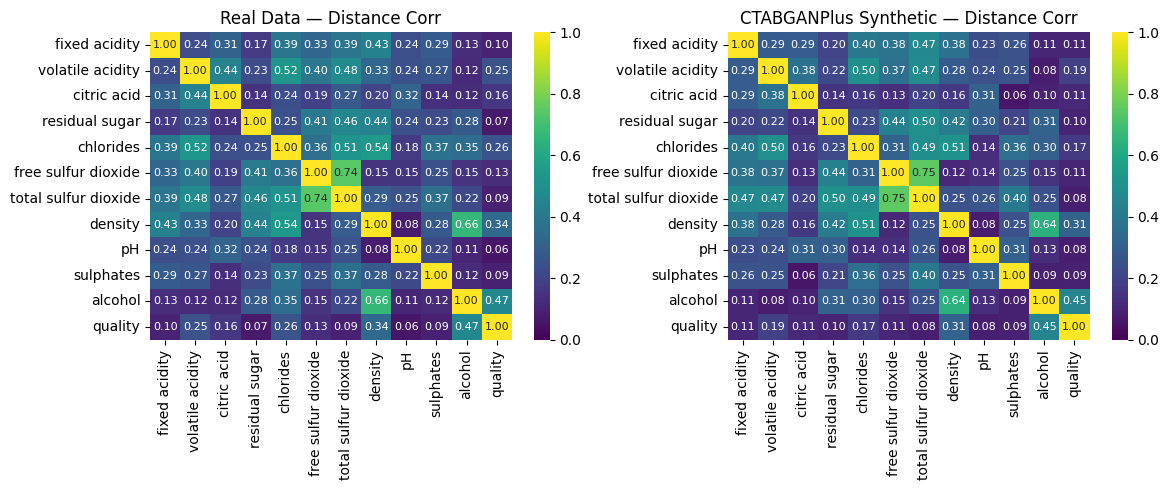

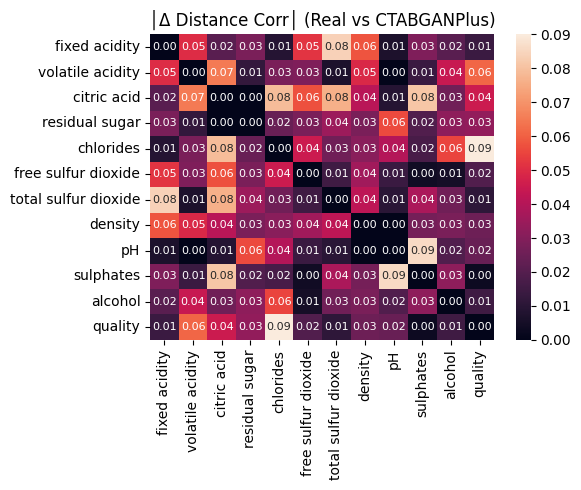


Top 3 biggest Distance Corr shifts:

------------------------------------------------------
Pair                      |    Real |    Fake |  Abs Δ
------------------------------------------------------
chlorides – quality       |    0.26 |    0.17 |   0.09
pH – sulphates            |    0.22 |    0.31 |   0.09
fixed acidity – total sulfur dioxide |    0.39 |    0.47 |   0.08
------------------------------------------------------


In [16]:
# Compute distance correlation matrices for real and fake 
real_dcor = distance_correlation_matrix(real_num.values)
fake_dcor = distance_correlation_matrix(CTABGANPlus_num.values)

real_dcor = pd.DataFrame(real_dcor, index=real_num.columns, columns=real_num.columns)
fake_dcor = pd.DataFrame(fake_dcor, index=CTABGANPlus_num.columns, columns=CTABGANPlus_num.columns)

#  Plot side by side 
fig, axes = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)
sns.heatmap(real_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[0])
axes[0].set_title("Real Data — Distance Corr")

sns.heatmap(fake_dcor, vmin=0, vmax=1, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size":8}, ax=axes[1])
axes[1].set_title("CTABGANPlus Synthetic — Distance Corr")

plt.show()

# --- Difference heatmap ---
diff_dcor = (real_dcor - fake_dcor).abs().round(3)
plt.figure(figsize=(6,5))
sns.heatmap(diff_dcor, vmin=0, vmax=diff_dcor.values.max(), cmap="rocket",
            annot=True, fmt=".2f", annot_kws={"size":8})
plt.title("│Δ Distance Corr│ (Real vs CTABGANPlus)")
plt.tight_layout()
plt.show()

# --- Extract top 3 biggest shifts ---
i, j = np.triu_indices_from(diff_dcor, k=1)
pairs = [
    {
        "Metric": "Distance Corr",
        "Pair": f"{diff_dcor.columns[i_]} – {diff_dcor.columns[j_]}",
        "Real": real_dcor.values[i_, j_],
        "Fake": fake_dcor.values[i_, j_],
        "Abs Δ": diff_dcor.values[i_, j_]
    }
    for i_, j_ in zip(i, j)
]
dcor_top3 = sorted(pairs, key=lambda x: x["Abs Δ"], reverse=True)[:3]

# --- Pretty print standalone table ---
col_width = 25
header = f"{'Pair':<{col_width}} | {'Real':>7} | {'Fake':>7} | {'Abs Δ':>6}"
print("\nTop 3 biggest Distance Corr shifts:\n")
print("-" * len(header))
print(header)
print("-" * len(header))
for r in dcor_top3:
    print(f"{r['Pair']:<{col_width}} | "
          f"{r['Real']:>7.2f} | "
          f"{r['Fake']:>7.2f} | "
          f"{r['Abs Δ']:>6.2f}")
print("-" * len(header))



In [17]:
#  MAE for distance correlation 
vals = diff_dcor.values[np.triu_indices_from(diff_dcor, k=1)]
mae_dcor = vals.mean()
print("Mean absolute Distance Corr diff (MAE):", round(mae_dcor, 3))


Mean absolute Distance Corr diff (MAE): 0.032


In [18]:
from tabulate import tabulate
import pandas as pd

def pretty_print_grouped_block(top3_dict):
    rows = []
    for metric, records in top3_dict.items():
        df = pd.DataFrame(records)
        
        # Handle different key names gracefully
        if "Pair" not in df.columns:
            # some records may have Feature 1 & Feature 2 instead
            df["Pair"] = df["Feature 1"] + " – " + df["Feature 2"]
        
        # keep only relevant columns if they exist
        cols = ["Pair"]
        if "Real" in df.columns: cols.append("Real")
        if "Fake" in df.columns: cols.append("Fake")
        if "Abs Δ" in df.columns: cols.append("Abs Δ")
        
        df = df[cols]
        
        # build rows with metric only once
        for idx, row in df.iterrows():
            rows.append([
                metric if idx == df.index[0] else "",
                row["Pair"],
                f"{row['Real']:.3f}" if "Real" in df.columns else "",
                f"{row['Fake']:.3f}" if "Fake" in df.columns else "",
                f"{row['Abs Δ']:.3f}" if "Abs Δ" in df.columns else ""
            ])
        
        # add separator row
        rows.append(["-"*10, "-"*20, "-"*5, "-"*5, "-"*5])
    
    headers = ["Metric", "Pair", "Real", "Fake", "Abs Δ"]
    print(tabulate(rows, headers=headers, tablefmt="pretty"))

# --- Collect into dict ---
top3_dict = {
    "Pearson": pearson_top3,
    "Spearman": spear_top3,
    "Distance Corr": dcor_top3
}

pretty_print_grouped_block(top3_dict)


+---------------+--------------------------------------+--------+--------+-------+
|    Metric     |                 Pair                 |  Real  |  Fake  | Abs Δ |
+---------------+--------------------------------------+--------+--------+-------+
|    Pearson    |            pH – sulphates            | 0.168  | 0.292  | 0.123 |
|               |       citric acid – chlorides        | 0.046  | -0.053 | 0.099 |
|               |   chlorides – total sulfur dioxide   | -0.337 | -0.434 | 0.097 |
|  ----------   |         --------------------         | -----  | -----  | ----- |
|   Spearman    |         chlorides – quality          | -0.304 | -0.162 | 0.140 |
|               | fixed acidity – total sulfur dioxide | -0.247 | -0.374 | 0.130 |
|               |            pH – sulphates            | 0.236  | 0.332  | 0.100 |
|  ----------   |         --------------------         | -----  | -----  | ----- |
| Distance Corr |         chlorides – quality          | 0.257  | 0.167  | 0.090 |
|   

In [19]:
print(pearson_top3[0])
print(spear_top3[0])
print(dcor_top3[0])

{'Metric': 'Pearson', 'Pair': 'pH – sulphates', 'Real': 0.16828682055398644, 'Fake': 0.29166101340346573, 'Abs Δ': 0.12337419284947929}
{'Metric': 'Spearman', 'Pair': 'chlorides – quality', 'Real': -0.3036190163341512, 'Fake': -0.1621790870582149, 'Abs Δ': 0.14}
{'Metric': 'Distance Corr', 'Pair': 'chlorides – quality', 'Real': 0.2574832869021453, 'Fake': 0.1671400897487654, 'Abs Δ': 0.09}


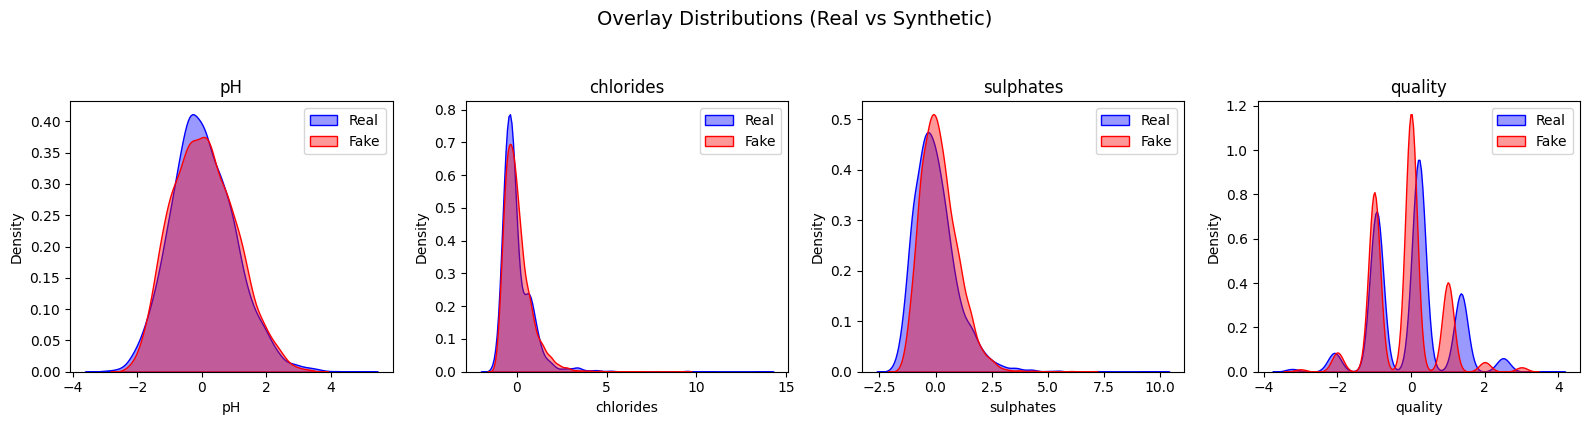

In [20]:
features = ["pH", "chlorides", "sulphates", "quality"]

fig, axes = plt.subplots(1, len(features), figsize=(4*len(features), 4), tight_layout=True)

for idx, feat in enumerate(features):
    sns.kdeplot(real_num[feat], fill=True, color="blue", label="Real", ax=axes[idx], alpha=0.4)
    sns.kdeplot(CTABGANPlus_num[feat], fill=True, color="red", label="Fake", ax=axes[idx], alpha=0.4)
    axes[idx].set_title(feat)
    axes[idx].legend()

plt.suptitle("Overlay Distributions (Real vs Synthetic)", fontsize=14, y=1.05)
plt.show()


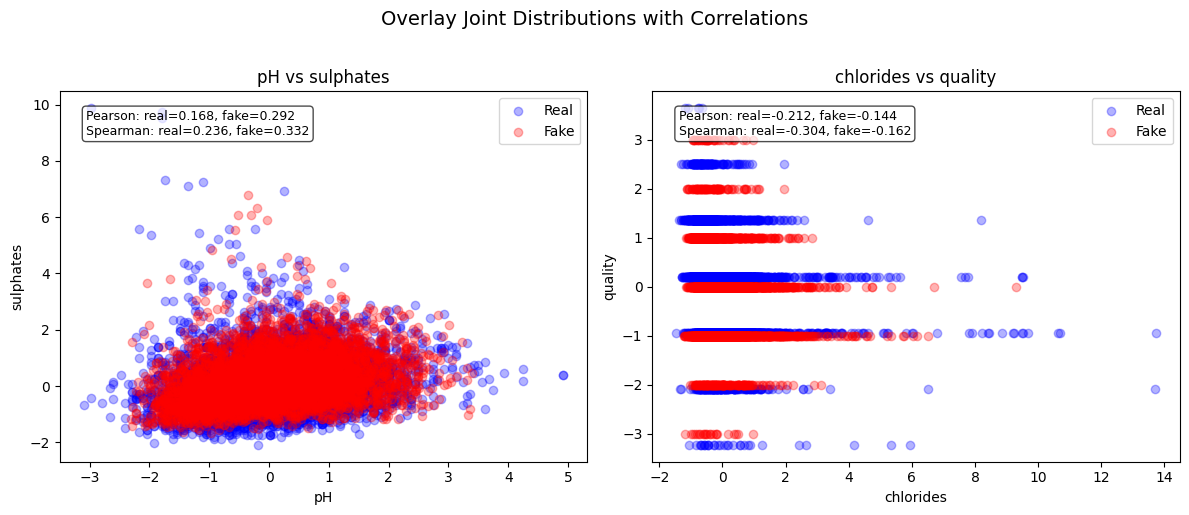

In [21]:
from scipy.stats import spearmanr

pairs = [
    ("pH", "sulphates"),
    ("chlorides", "quality")
]

fig, axes = plt.subplots(1, len(pairs), figsize=(6*len(pairs), 5), tight_layout=True)

for idx, (f1, f2) in enumerate(pairs):
    # --- Scatter overlay ---
    axes[idx].scatter(real_num[f1], real_num[f2], alpha=0.3, color="blue", label="Real")
    axes[idx].scatter(CTABGANPlus_num[f1], CTABGANPlus_num[f2], alpha=0.3, color="red", label="Fake")

    axes[idx].set_title(f"{f1} vs {f2}")
    axes[idx].set_xlabel(f1)
    axes[idx].set_ylabel(f2)

    # --- Compute correlations ---
    pear_real = real_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    pear_fake = CTABGANPlus_num[[f1, f2]].corr(method="pearson").iloc[0,1]
    spear_real, _ = spearmanr(real_num[f1], real_num[f2])
    spear_fake, _ = spearmanr(CTABGANPlus_num[f1], CTABGANPlus_num[f2])

    # --- Annotate on plot ---
    textstr = (f"Pearson: real={pear_real:.3f}, fake={pear_fake:.3f}\n"
               f"Spearman: real={spear_real:.3f}, fake={spear_fake:.3f}")
    axes[idx].text(0.05, 0.95, textstr, transform=axes[idx].transAxes,
                   fontsize=9, va="top", ha="left",
                   bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

    axes[idx].legend()

plt.suptitle("Overlay Joint Distributions with Correlations", fontsize=14, y=1.02)
plt.show()
